# ORDER_AMOUNT PREDICTION Machine Learning Project

# MILESTONE-1

In [1]:
import pandas as pd #1.Use the PRS dataset to create a dataframe
import numpy as np
df = pd.read_csv('C:\\Users\\KIIT\\Pictures\\New folder\\Final.csv')#path of the csv file given
df.head() #display

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [2]:
df.describe() #2.Check the description of the dataframe

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [3]:
df.shape #3.Check the shape of the dataframe 
# that is 16 columns and 1101925 rows.

(1101925, 16)

In [4]:
df.info() #4.Check the data frame informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [5]:
df.isnull() #5.Check for the Null values in the dataframe

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101921,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101922,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101923,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [6]:
df.isnull().sum()  #shows the null value in each column separately

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [7]:
df.isnull().sum().sum() #total null values in dataframe

901139

In [8]:
df.fillna(np.NaN, inplace=True) #6.Replace all the null values with "NaN"


901139

In [9]:
df["ORDER_CREATION_DATE"] = pd.to_datetime(df["ORDER_CREATION_DATE"], format="%Y%m%d") #7.Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"

df.head() #display to check

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [10]:
df["REQUESTED_DELIVERY_DATE"] = pd.to_datetime(df["REQUESTED_DELIVERY_DATE"], format="%Y%m%d") #8. same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"

df.head()#display to check

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400


In [11]:
records_greater_delivery = df[df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"]] #9.Sanity check - Check how many records are having order date greater than the delivery date
num_records_greater_delivery = len(records_greater_delivery) #returns the number of records in records_greater_delivery
print(num_records_greater_delivery)#this much has order creation date greater than delivery date so it is invalid sata and needs to be deleted.

27142


In [12]:
df = df.drop(df[df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"]].index) #10.Remove those records where order date is greater than the delivery date using drop method
df.shape #the data is reduced from (1101925, 16) to the number below. so the difference between the rows are being dropped as they contained invalid data.

(1074783, 16)

In [13]:
num_records_with_dash = df[df["ORDER_AMOUNT"].str.contains("-")].shape[0] #11.Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.

print(num_records_with_dash) #display the amount

32


In [14]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace("-", "")#12.Replace “-” with “” from the “ORDER_AMOUNT” field. 

num_records_with_comma = df[df["ORDER_AMOUNT"].str.contains(",")].shape[0] # 13.Check the number of records where the “ORDER_AMOUNT” field is having “,” in it.then calculate the number of rows using shape[0]
print(num_records_with_comma) #display the amount

1073406


In [15]:
df["ORDER_AMOUNT"]=df["ORDER_AMOUNT"].str.replace(",",".") #14.Replace “,” with “.” from the “ORDER_AMOUNT” field. 
df.head() #display

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400


In [16]:
num_records_same_date = len(df[df["ORDER_CREATION_DATE"] == df["REQUESTED_DELIVERY_DATE"]])
#15.Count the number of records where the order date and the delivery date are same

print(num_records_same_date) #print amount

100437


In [17]:
currency_counts = df.groupby("ORDER_CURRENCY").size() #16.Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”
#groupby method is used that groups the DataFrame df by the unique values in the "ORDER_CURRENCY" column
print(currency_counts) #display

ORDER_CURRENCY
AED      7852
AUD     64200
BHD        32
CAD     55065
CHF      5259
CZK      2178
EUR    253196
GBP     22028
HKD      6198
HU1      1377
KWD         7
MYR     13946
NZD        79
PLN     11861
QAR        12
RON      4731
SAR        14
SEK         4
SGD      3909
USD    622835
dtype: int64


In [18]:
conversion_rates = {
    'USD': 1.0, #conversion values from internet source
    'EUR': 1.08,
    'AED': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HUF': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')

def convert_to_usd(row):
    if row['ORDER_CURRENCY'] != 'USD' and pd.notnull(row['ORDER_AMOUNT']):
        return row['ORDER_AMOUNT'] * conversion_rates.get(row['ORDER_CURRENCY'], 0)
    else:
        return row['ORDER_AMOUNT']

df['amount_in_usd'] = df.apply(convert_to_usd,axis=1) #17.Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 
#axis=1 specifies that the operation is applied row-wise.

In [19]:
df.head() #check if new column is created and amount is in usd.

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000


In [20]:
zero_amounts = df[df['amount_in_usd'] == 0] #18.Check for values “0” in the “'amount_in_usd” column. 

print(zero_amounts['amount_in_usd'])

4          0.0
57         0.0
62         0.0
67         0.0
117        0.0
          ... 
1101917    0.0
1101918    0.0
1101921    0.0
1101922    0.0
1101923    0.0
Name: amount_in_usd, Length: 301881, dtype: float64


In [21]:
zero_amt=(df['amount_in_usd']==0).sum() #sum of all the zero value amounts using sum method
zero_amt

301881

In [22]:
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str) #19.Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
#first both fields are converted to string type then added to form the unique_cust_id
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,12103514003290


In [23]:
df.head(50) #Final manipulated data is displayed upto 50 rows.

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,12103514003290
5,819741436,3605,Argentina,South-Region,"0,00",N250,3290,2022-01-01,160023,NR04,787347798,1065.33,2022-01-07,EUR,64.0,1210124309,1150.5564,12101243093290
7,881355361,3645,Armenia,North-Region,"0,00",NAAA,3470,2022-01-02,110022,NR04,884689948,302.85,2022-01-06,EUR,64.0,12311152,327.0780,123111523470
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,2022-01-02,130024,NR02,814096053,8380.69,2022-01-06,EUR,NaN,1230021722,9051.1452,12300217223220
9,957194828,3150,United States Minor Outlying Islands,South-Region,"0,00",N241,3290,2022-01-02,133014,NR03,901859762,545.85,2022-01-07,EUR,64.0,1210183107,589.5180,12101831073290
10,806322513,3396,Serbia,South-Region,"660,48",N241,3290,2022-01-02,133014,NR04,770447645,545.85,2022-01-07,EUR,93.0,1210499770,589.5180,12104997703290


# MILESTONE-2

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

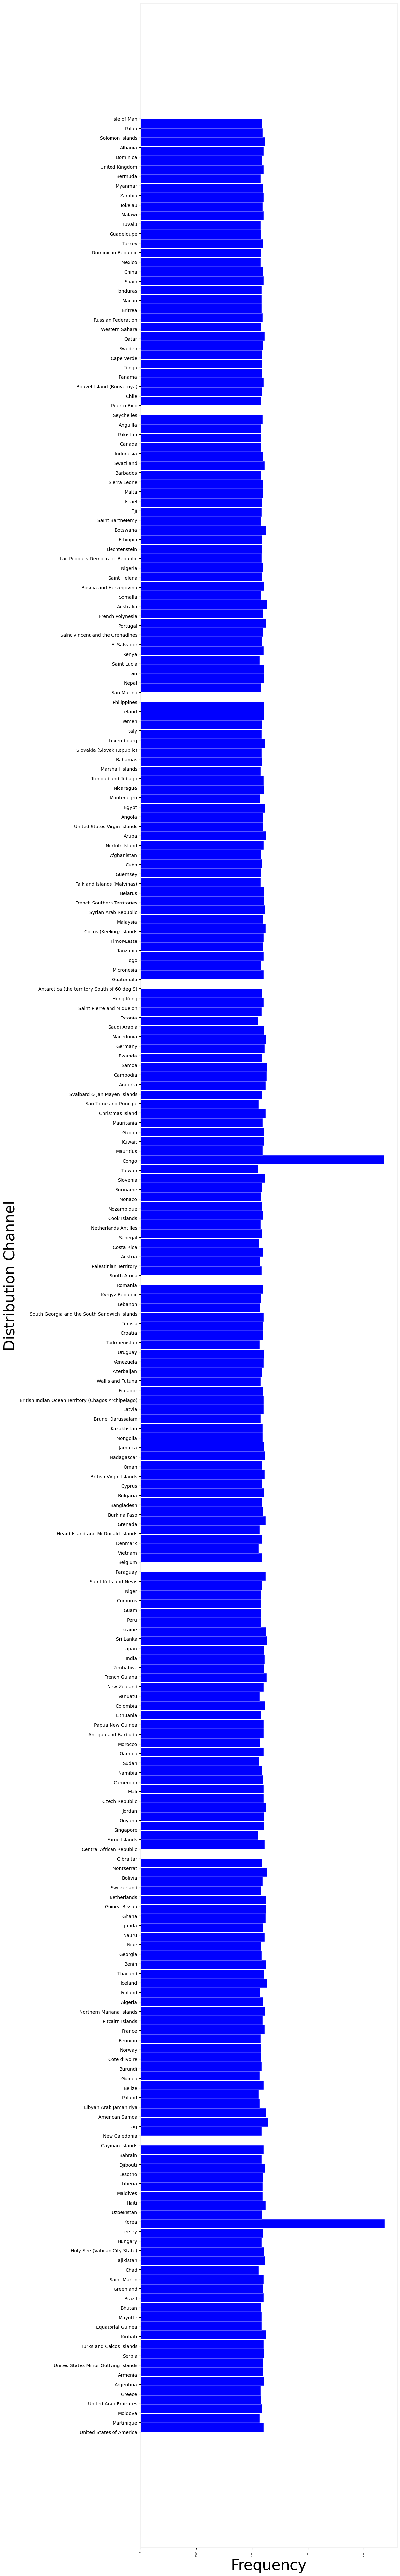

In [25]:
plt.subplots(figsize=(10,100))
plt.hist(df['DISTRIBUTION_CHANNEL'],bins=250,facecolor='blue',edgecolor='white',orientation=u'horizontal')
plt.xlabel('Frequency',fontsize=32)
plt.ylabel('Distribution Channel',fontsize=32)
plt.xticks(fontsize=5,rotation=90)
plt.show()
# histogram visualizes the distribution of values in the "DISTRIBUTION_CHANNEL" column.
# y-axis represents the distribution channels, and the x-axis represents the frequency 
#here we come to know the frequency of distribution in each channel.

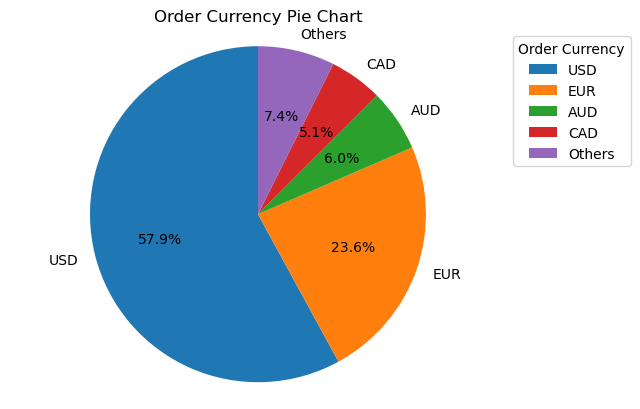

In [26]:
order = df['ORDER_CURRENCY'].value_counts()
threshold = 0.05 #Any currency with a proportion below this threshold will be grouped as "Others" in the pie chart.
small_currencies = order[order/sum(order) < threshold]
order = order.drop(small_currencies.index)
order['Others'] = sum(small_currencies)
plt.pie(order, labels=order.index, autopct='%1.1f%%', startangle=90)
plt.title('Order Currency Pie Chart')
plt.legend(title='Order Currency', loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()
#pie chart visualizes the distribution of different order currencies in the dataset
#smaller currencies are taken into others for better data visuallization

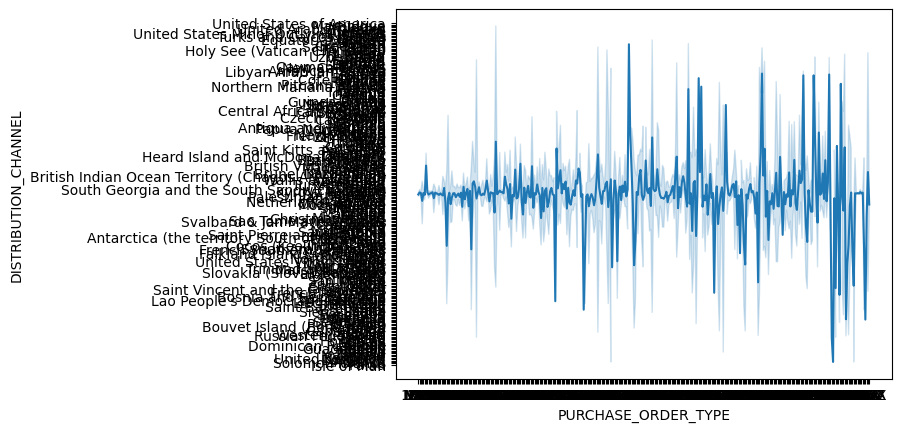

In [27]:
sns.lineplot(x=df['PURCHASE_ORDER_TYPE'],y=df['DISTRIBUTION_CHANNEL'],data=df)
plt.show()
#line plot visualizes the relationship between the "PURCHASE_ORDER_TYPE" and "DISTRIBUTION_CHANNEL" variables.

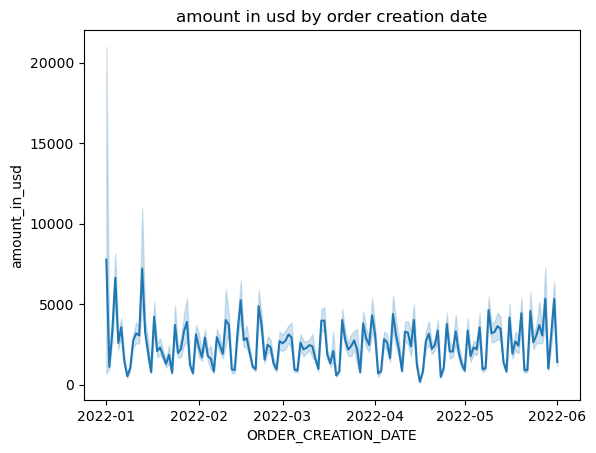

In [28]:
sns.lineplot(x=df['ORDER_CREATION_DATE'],y=df['amount_in_usd'],data=df)
plt.title("amount in usd by order creation date")
plt.show() 
#This line plot visualizes the relationship between the "ORDER_CREATION_DATE" and "amount_in_usd".

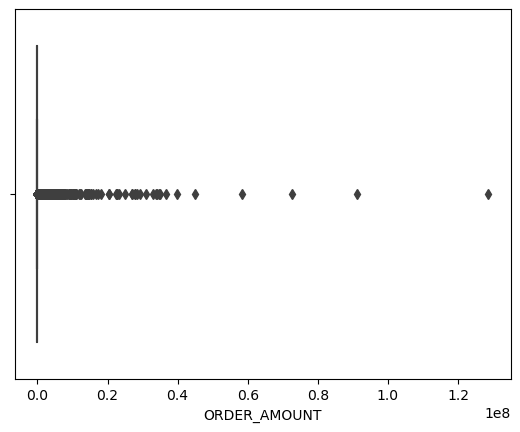

In [29]:
sns.boxplot(x=df['ORDER_AMOUNT'],data=df)
plt.show()
#shows distribution of order amount

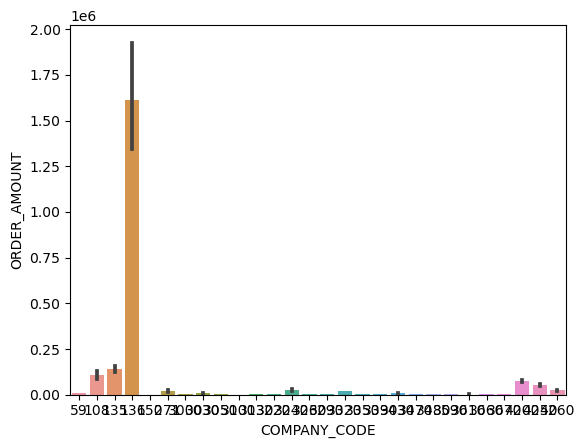

In [30]:
sns.barplot(x=df['COMPANY_CODE'],y=df['ORDER_AMOUNT'],data=df) 
plt.show()
#The bar plot displays the relationship between the "COMPANY_CODE" and "ORDER_AMOUNT"

# MILESTONE-3

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
amount_median = df['amount_in_usd'].median() #Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

# Calculate the IQR of the "AMOUNT_IN_USD" column
q1 = df['amount_in_usd'].quantile(0.25) #first quartile
q3 = df['amount_in_usd'].quantile(0.75) #third quartile
iqr = q3 - q1 #finding inter quartile range

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the median value
df['amount_in_usd'] = df['amount_in_usd'].apply(lambda x: amount_median if x < lower_bound or x > upper_bound else x)

In [33]:
#Label encoding or One hot Encoding on all the categorical columns
categorical = []  #initialize

continuous = []

for col in df.columns:
    if df[col].dtype == 'object': #check data type
        categorical.append(col) #If the column is categorical, it is appended to the categorical list.
    else:
        continuous.append(col) #else appened to continous column
print("Categorical columns:")
print(categorical)

print("\nContinuous columns:")
print(continuous)


Categorical columns:
['DISTRIBUTION_CHANNEL', 'DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'unique_cust_id']

Continuous columns:
['CUSTOMER_ORDER_ID', 'SALES_ORG', 'COMPANY_CODE', 'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE', 'CREDIT_STATUS', 'CUSTOMER_NUMBER', 'amount_in_usd']


In [34]:
#Label encoding or One hot Encoding on all the categorical columns
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col]) #fits the encoder to the column data and transforms the column values into encoded integers.
    

In [35]:
columns_to_transform = ['ORDER_AMOUNT', 'amount_in_usd'] #Log Transformations on continuous columns that is order amount and amount in usd in order to normalize the values.

# added a small constant to zero values done to avoid taking the log of zero or near-zero values resulting in infinite values.
small_constant = 1e-8 
df[columns_to_transform] = np.log(df[columns_to_transform] + small_constant) #log transformation

# Print the updated DataFrame
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,6.861303,2022-01-13,6,NaN,12311807,6.938264,6608
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,6.668686,2022-01-11,6,NaN,12311807,6.745647,6608
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,11.119786,2022-01-12,6,93.0,12118758,5.445271,4405
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,7.248177,2022-01-06,6,93.0,1210499770,7.325138,4059
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,-18.420681,2022-01-06,6,64.0,1210351400,-18.420681,2919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,79,1,1,350,4260,2022-06-01,74357,1,946056501,8.392806,2022-06-01,18,NaN,1210331804,5.445271,2782
1101921,998890898,4509,10,1,1,350,4260,2022-06-01,84052,3,894775488,-18.420681,2022-06-01,18,NaN,1210331804,-18.420681,2782
1101922,983330221,3951,151,1,1,350,4260,2022-06-01,85322,0,909729781,-18.420681,2022-06-01,18,NaN,1210331811,-18.420681,2784
1101923,926668029,3235,167,1,1,350,4260,2022-06-01,90538,7,940836817,-18.420681,2022-06-01,18,NaN,1210331811,-18.420681,2784


In [36]:
grouped_df = df.groupby('SALES_ORG').agg({  #Try to extract new features by grouping existing columns
    'ORDER_AMOUNT': ['mean'], #aggregated and grouped values accoring to mean,sum,uniqueness and max value
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()

grouped_df.columns = ['SALES_ORG', 'Average_order_amount', 'Total_credit_value', 'Unique_customers', 'Max_amount_usd'] # New column names to the grouped dataframe are assigned for ease of reading


In [37]:
grouped_df

,SALES_ORG,Average_order_amount,Total_credit_value,Unique_customers,Max_amount_usd
0,2100,-0.499566,609429,141,7.460565
1,2101,0.377390,723167,129,7.466408
2,2102,0.410255,594668,116,7.459535
3,2103,0.382793,667986,124,7.458878
4,2104,0.003778,806552,137,7.434772
...,...,...,...,...,...
2406,4506,0.779161,613023,143,7.466605
2407,4507,0.778659,620833,122,7.468091
2408,4508,0.147677,775251,139,7.444254
2409,4509,0.589673,487248,146,7.460950


C:\Users\KIIT\AppData\Local\Temp\ipykernel_7444\600958838.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


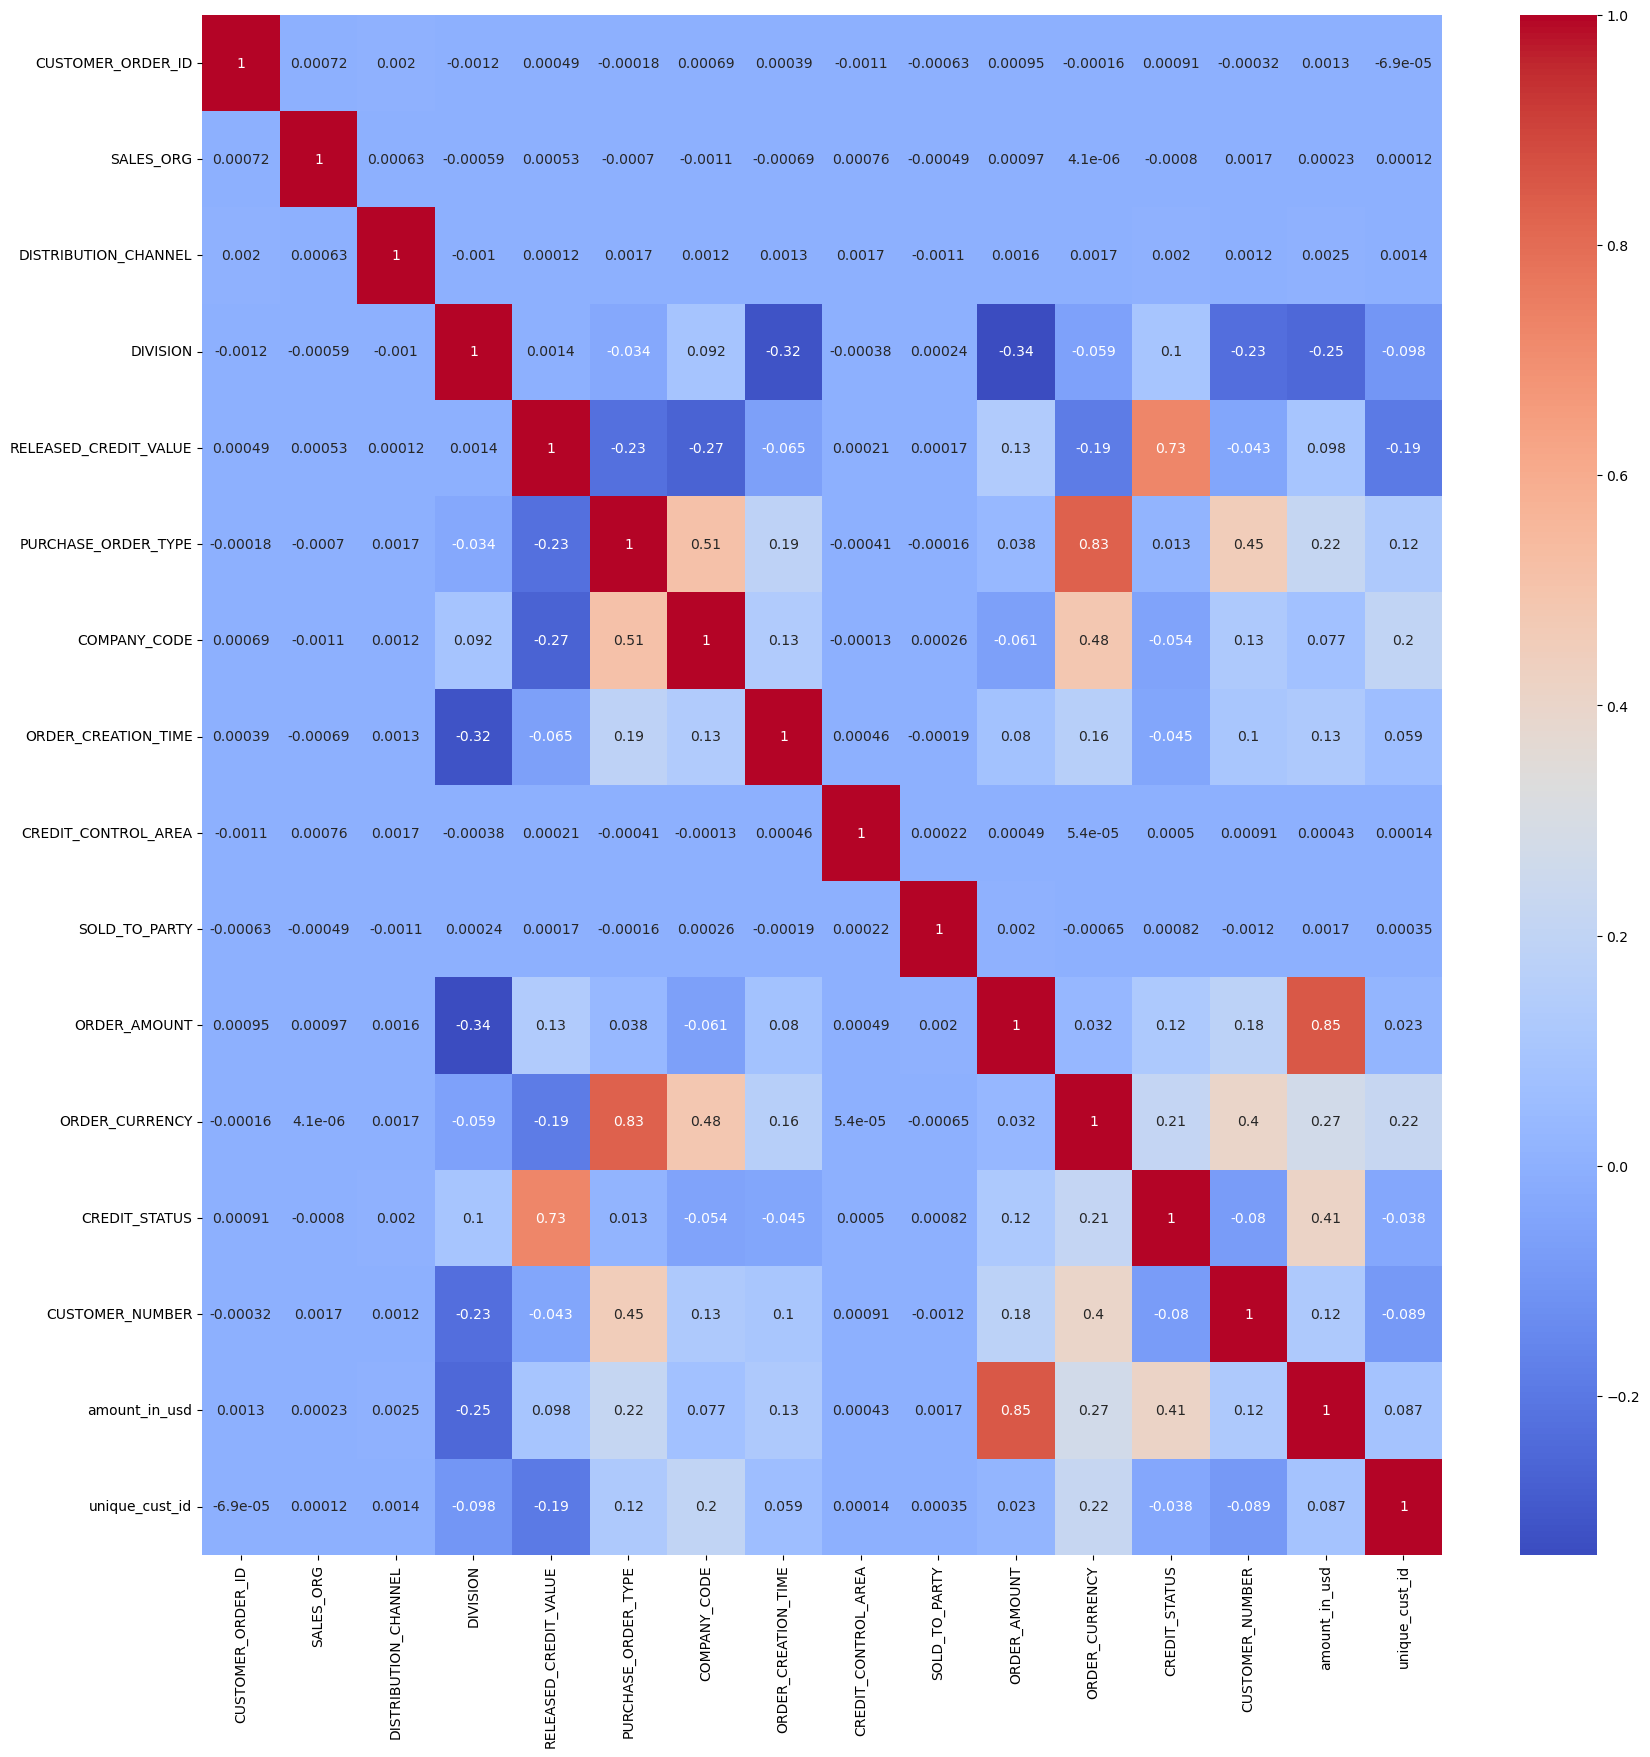

In [38]:
plt.figure(figsize=(20, 20))   #Create a heatmap to find correlation between the columns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [39]:
df.corr()['ORDER_AMOUNT'].abs().sort_values(ascending=False) #checking the corelation of all the columns wrt ORDER_AMOUNT that is the target column. 

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7444\1507849076.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['ORDER_AMOUNT'].abs().sort_values(ascending=False) #corelation wrt order amount


ORDER_AMOUNT             1.000000
amount_in_usd            0.850792
DIVISION                 0.337929
CUSTOMER_NUMBER          0.184482
RELEASED_CREDIT_VALUE    0.134115
CREDIT_STATUS            0.119747
ORDER_CREATION_TIME      0.080410
COMPANY_CODE             0.061262
PURCHASE_ORDER_TYPE      0.038153
ORDER_CURRENCY           0.032475
unique_cust_id           0.022671
SOLD_TO_PARTY            0.002032
DISTRIBUTION_CHANNEL     0.001594
SALES_ORG                0.000970
CUSTOMER_ORDER_ID        0.000952
CREDIT_CONTROL_AREA      0.000487
Name: ORDER_AMOUNT, dtype: float64

In [40]:
df.corr()['amount_in_usd'].abs().sort_values(ascending=False)#checking the corelation of all the columns wrt amount in usd that is the target column. 

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7444\36152074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['amount_in_usd'].abs().sort_values(ascending=False)


amount_in_usd            1.000000
ORDER_AMOUNT             0.850792
CREDIT_STATUS            0.410050
ORDER_CURRENCY           0.268353
DIVISION                 0.253227
PURCHASE_ORDER_TYPE      0.217738
ORDER_CREATION_TIME      0.126941
CUSTOMER_NUMBER          0.122041
RELEASED_CREDIT_VALUE    0.097645
unique_cust_id           0.087030
COMPANY_CODE             0.076823
DISTRIBUTION_CHANNEL     0.002483
SOLD_TO_PARTY            0.001699
CUSTOMER_ORDER_ID        0.001306
CREDIT_CONTROL_AREA      0.000426
SALES_ORG                0.000231
Name: amount_in_usd, dtype: float64

In [41]:
corr_matrix=df.corr().abs() #df.corr() computes the correlation between columns of the DataFrame df. result is stored in coee_matrix

high_var=np.where(corr_matrix>0.7) #choose and store all values whose corelation is more than 0.7
high_corr=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_var) if x!=y and x<y] #x != y to avoid including the same column twice in a pair, and x < y to consider each pair only once and avoid duplicates.
print(high_corr)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7444\1559140289.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr().abs()


[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('ORDER_AMOUNT', 'amount_in_usd')]


In [42]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,6.861303,2022-01-13,6,NaN,12311807,6.938264,6608
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,6.668686,2022-01-11,6,NaN,12311807,6.745647,6608
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,11.119786,2022-01-12,6,93.0,12118758,5.445271,4405
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,7.248177,2022-01-06,6,93.0,1210499770,7.325138,4059
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,-18.420681,2022-01-06,6,64.0,1210351400,-18.420681,2919


# MILESTONE-4

In [43]:
df.dtypes #to check the format of order creation date ans requested delivery date 


CUSTOMER_ORDER_ID                   int64
SALES_ORG                           int64
DISTRIBUTION_CHANNEL                int32
DIVISION                            int32
RELEASED_CREDIT_VALUE               int32
PURCHASE_ORDER_TYPE                 int32
COMPANY_CODE                        int64
ORDER_CREATION_DATE        datetime64[ns]
ORDER_CREATION_TIME                 int64
CREDIT_CONTROL_AREA                 int32
SOLD_TO_PARTY                       int64
ORDER_AMOUNT                      float64
REQUESTED_DELIVERY_DATE    datetime64[ns]
ORDER_CURRENCY                      int32
CREDIT_STATUS                     float64
CUSTOMER_NUMBER                     int64
amount_in_usd                     float64
unique_cust_id                      int32
dtype: object

In [44]:
df.isna().sum()/df.shape[0]*100 #checking percentage of NaN values in each column beacuse these have to be replaced before training.

CUSTOMER_ORDER_ID           0.000000
SALES_ORG                   0.000000
DISTRIBUTION_CHANNEL        0.000000
DIVISION                    0.000000
RELEASED_CREDIT_VALUE       0.000000
PURCHASE_ORDER_TYPE         0.000000
COMPANY_CODE                0.000000
ORDER_CREATION_DATE         0.000000
ORDER_CREATION_TIME         0.000000
CREDIT_CONTROL_AREA         0.000000
SOLD_TO_PARTY               0.000000
ORDER_AMOUNT                0.000000
REQUESTED_DELIVERY_DATE     0.000000
ORDER_CURRENCY              0.000000
CREDIT_STATUS              80.337705
CUSTOMER_NUMBER             0.000000
amount_in_usd               0.000000
unique_cust_id              0.000000
dtype: float64

In [45]:
df['CREDIT_STATUS'] = df['CREDIT_STATUS'].fillna(df['CREDIT_STATUS'].mean()) #fill the Nan values with mean of that column to replace the Nan values 

In [46]:
df.isna().sum()/df.shape[0]*100 #again check to find if its zero.

CUSTOMER_ORDER_ID          0.0
SALES_ORG                  0.0
DISTRIBUTION_CHANNEL       0.0
DIVISION                   0.0
RELEASED_CREDIT_VALUE      0.0
PURCHASE_ORDER_TYPE        0.0
COMPANY_CODE               0.0
ORDER_CREATION_DATE        0.0
ORDER_CREATION_TIME        0.0
CREDIT_CONTROL_AREA        0.0
SOLD_TO_PARTY              0.0
ORDER_AMOUNT               0.0
REQUESTED_DELIVERY_DATE    0.0
ORDER_CURRENCY             0.0
CREDIT_STATUS              0.0
CUSTOMER_NUMBER            0.0
amount_in_usd              0.0
unique_cust_id             0.0
dtype: float64

In [47]:
df.corr()['amount_in_usd'].abs().sort_values(ascending=False) #checking the corelation of all the columns wrt amount in usd that is the target column. 

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7444\36152074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['amount_in_usd'].abs().sort_values(ascending=False)


amount_in_usd            1.000000
ORDER_AMOUNT             0.850792
ORDER_CURRENCY           0.268353
DIVISION                 0.253227
PURCHASE_ORDER_TYPE      0.217738
CREDIT_STATUS            0.200531
ORDER_CREATION_TIME      0.126941
CUSTOMER_NUMBER          0.122041
RELEASED_CREDIT_VALUE    0.097645
unique_cust_id           0.087030
COMPANY_CODE             0.076823
DISTRIBUTION_CHANNEL     0.002483
SOLD_TO_PARTY            0.001699
CUSTOMER_ORDER_ID        0.001306
CREDIT_CONTROL_AREA      0.000426
SALES_ORG                0.000231
Name: amount_in_usd, dtype: float64

In [48]:
df.drop(['SALES_ORG','CUSTOMER_ORDER_ID','CREDIT_CONTROL_AREA'],axis=1,inplace=True) 
#dropped these because of very less corelation amount in usd further these features hold minimum impact on order amount or amount in usd.

In [49]:
df.head()

,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,232,1,1,0,3220,2022-01-01,43012,756141537,6.861303,2022-01-13,6,74.453619,12311807,6.938264,6608
1,135,1,1,0,3220,2022-01-01,43114,798847812,6.668686,2022-01-11,6,74.453619,12311807,6.745647,6608
2,141,1,43496,204,3260,2022-01-01,110019,960984659,11.119786,2022-01-12,6,93.000000,12118758,5.445271,4405
3,228,1,7852,255,3290,2022-01-01,153013,925857642,7.248177,2022-01-06,6,93.000000,1210499770,7.325138,4059
4,82,1,1,255,3290,2022-01-01,160020,947942786,-18.420681,2022-01-06,6,64.000000,1210351400,-18.420681,2919


In [50]:
df.drop(['ORDER_CREATION_DATE','REQUESTED_DELIVERY_DATE',],axis=1,inplace=True) 
#dropped these because it is in date time format and not int format and we can only train continous values that is int float etc
#further these columns do not directly impact the order amount or amount in usd.

In [51]:
df.head()

,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_TIME,SOLD_TO_PARTY,ORDER_AMOUNT,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,232,1,1,0,3220,43012,756141537,6.861303,6,74.453619,12311807,6.938264,6608
1,135,1,1,0,3220,43114,798847812,6.668686,6,74.453619,12311807,6.745647,6608
2,141,1,43496,204,3260,110019,960984659,11.119786,6,93.000000,12118758,5.445271,4405
3,228,1,7852,255,3290,153013,925857642,7.248177,6,93.000000,1210499770,7.325138,4059
4,82,1,1,255,3290,160020,947942786,-18.420681,6,64.000000,1210351400,-18.420681,2919


In [52]:
from sklearn.model_selection import train_test_split #split data import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #import desired metrices

X = df.drop(['amount_in_usd','ORDER_AMOUNT'], axis=1) #x contains all other columns and hence target value is dropped from x that is the amount in usd.
#here i have also dropped the ORDER_AMOUNT because ORDER_AMOUNT is the converted and derived value from amount in usd so including the order amount in y axis can cause data leakage.
y = df['amount_in_usd'] #y axis contains target column that is order amount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #default command where test size is taken to be 20 percent

In [53]:
from sklearn.linear_model import LinearRegression #import the desired model 

lr = LinearRegression() #set it to a variable lr and it is regressor because the data frame contains continuous data
lr.fit(X_train, y_train) #fit the model so we give the train values of x and y, default command to train the model

y_predL = lr.predict(X_test) #ypred is predicted label for test set. Takes the feature data (X_test) as input and generates predictions for the corresponding target variable labels. These predicted labels are then stored in the variable y_predL.

print('MSE:', mean_squared_error(y_test, y_predL))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predL))) #calculates the mean squared error (MSE) between the true labels (y_test) and the predicted labels (y_predL). The calculated MSE is then passed as an argument to np.sqrt() to obtain the root mean squared error (RMSE).LOWER THE BETTER
print('MAE:', mean_absolute_error(y_test, y_predL)) #similarly calculate the mae, LOWER THE BETTER
print('R2:', r2_score(y_test, y_predL)) #similarly calculate the r2, HIGHER THE BETTER AND CANNOT BE MORE THAN 1.

MSE: 97.57719851950623
RMSE: 9.878117154574865
MAE: 8.194755960554136
R2: 0.1713542696775382


In [54]:
from sklearn.tree import DecisionTreeRegressor #decision tree model train

qw =  DecisionTreeRegressor()
qw.fit(X_train, y_train)

y_predD = qw.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_predD))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predD)))
print('MAE:', mean_absolute_error(y_test, y_predD))
print('R2:', r2_score(y_test, y_predD))

MSE: 56.89863134349737
RMSE: 7.5431181446068685
MAE: 2.8810313565811003
R2: 0.5168050667640803


In [55]:
from sklearn.ensemble import RandomForestRegressor #random forest model train

er =  RandomForestRegressor(n_jobs=-1)#n_jobs=-1 would  allow the computation to be parallelized across all available CPU cores, making use of multi-core processing to speed up the execution time.
er.fit(X_train, y_train)

y_predR = er.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_predR))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predR)))
print('MAE:', mean_absolute_error(y_test, y_predR))
print('R2:', r2_score(y_test, y_predR))

MSE: 31.582149401875373
RMSE: 5.619799765283045
MAE: 2.66595958436342
R2: 0.7317978620687854


In [56]:
#This model took more time to train because of not using n_jobs=-1
#this would  allows the computation to be parallelized across all available CPU cores, making use of multi-core processing to speed up the execution time.
# from sklearn.ensemble import RandomForestRegressor #random forest model train

# er =  RandomForestRegressor()
# er.fit(X_train, y_train)

# y_predR = er.predict(X_test)

# print('MSE:', mean_squared_error(y_test, y_predR))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predR)))
# print('MAE:', mean_absolute_error(y_test, y_predR))
# print('R2:', r2_score(y_test, y_predR))

In [57]:
from sklearn.ensemble import AdaBoostRegressor #AdaBoostRegressor model train

ty =  AdaBoostRegressor()
ty.fit(X_train, y_train)

y_predA = ty.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_predA))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predA)))
print('MAE:', mean_absolute_error(y_test, y_predA))
print('R2:', r2_score(y_test, y_predA))

MSE: 80.31662618313513
RMSE: 8.961954372966598
MAE: 7.217350614165789
R2: 0.3179346161772042


In [58]:
import xgboost as xgb #xgboost model train

ui =  xgb.XGBRegressor()
ui.fit(X_train, y_train)

y_predX = ui.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_predX))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predX)))
print('MAE:', mean_absolute_error(y_test, y_predX))
print('R2:', r2_score(y_test, y_predX))

MSE: 31.704695788166468
RMSE: 5.63069230096677
MAE: 3.089200559147287
R2: 0.7307571728370048


In [59]:
from sklearn.svm import LinearSVR #LinearSVR model train
lis = LinearSVR()
lis.fit(X_train, y_train)
y_predS = lis.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_predS))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predS)))
print('MAE:', mean_absolute_error(y_test, y_predS))
print('R2:', r2_score(y_test, y_predS))


MSE: 119.05308980642062
RMSE: 10.911145210582646
MAE: 9.215491616717912
R2: -0.01102343628020619


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [60]:
y_pred = [y_predL, y_predD, y_predR, y_predA, y_predX,y_predS] #compare the values in a dataframe to get the best fit model.
model_names = ['Linear Regression','Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost','LinearSVM']

rmses = []
maes = []
r2s = []
mse=[]

for pred in y_pred:
    rmses.append(np.sqrt(mean_squared_error(y_test, pred)))
    maes.append(mean_absolute_error(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    r2s.append(r2_score(y_test, pred))



results = pd.DataFrame({'Model': model_names, 'RMSE': rmses, 'MAE': maes, 'R2': r2s, 'MSE':mse})
print (results)

               Model       RMSE       MAE        R2         MSE
0  Linear Regression   9.878117  8.194756  0.171354   97.577199
1      Decision Tree   7.543118  2.881031  0.516805   56.898631
2      Random Forest   5.619800  2.665960  0.731798   31.582149
3           AdaBoost   8.961954  7.217351  0.317935   80.316626
4            XGBoost   5.630692  3.089201  0.730757   31.704696
5          LinearSVM  10.911145  9.215492 -0.011023  119.053090


In [61]:
sorted_results = results.sort_values(by='R2', ascending=False)
print(sorted_results)  #sorted results according to R2 value from dataframe in descending order.


               Model       RMSE       MAE        R2         MSE
2      Random Forest   5.619800  2.665960  0.731798   31.582149
4            XGBoost   5.630692  3.089201  0.730757   31.704696
1      Decision Tree   7.543118  2.881031  0.516805   56.898631
3           AdaBoost   8.961954  7.217351  0.317935   80.316626
0  Linear Regression   9.878117  8.194756  0.171354   97.577199
5          LinearSVM  10.911145  9.215492 -0.011023  119.053090


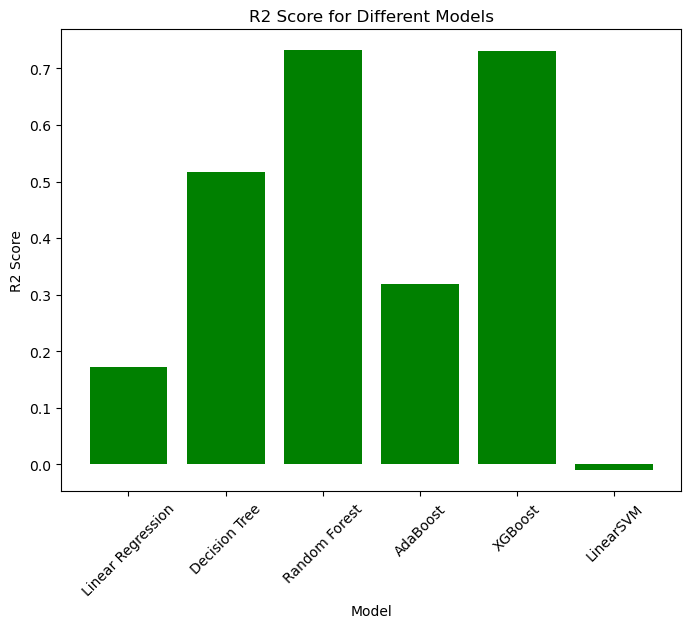

In [62]:
import matplotlib.pyplot as plt #plotted a bar graph to see the r2 values we got after training different models.

# Extract the model names and R2 values
model_names = results['Model']
r2_scores = results['R2']

# Plot the R2 scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color='green')  # Set color to red
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Models')
plt.xticks(rotation=45)
plt.show()


In [63]:
max_r2_value = results['R2'].max() #best model selection based on MAX R2 value.
print("Maximum value in 'R2' column:", max_r2_value)
subsequent_model = results.loc[results['R2'] == max_r2_value, 'Model'].values[0]
print("Trained Model Name: ", subsequent_model)

Maximum value in 'R2' column: 0.7317978620687854
Trained Model Name:  Random Forest


In [65]:
#Hyper parameter tuning with more parameters.
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# def hyperparam(X_train, y_train, X_test, y_test):
#     rf_reg = RandomForestRegressor()
#     param_grid = {
#         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#         'max_depth': [3, 4, 5],
#         'min_samples_split': [2,3,4],
#         'min_samples_leaf': [1, 2, 3],
        
#     }

#     grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=5)
#     grid_search.fit(X_train, y_train)

#     best_params = grid_search.best_params_
#     best_model = grid_search.best_estimator_

#     rf_pred = best_model.predict(X_test)
#     rf_mse = mean_squared_error(y_test, rf_pred)
#     rf_rmse = np.sqrt(rf_mse)
#     rf_r2 = r2_score(y_test, rf_pred)
#     rf_mae = mean_absolute_error(y_test, rf_pred)

#     print("Best Hyperparameters:", best_params)
#     print("Random Forest - MSE:", rf_mse)
#     print("Random Forest - RMSE:", rf_rmse)
#     print("Random Forest - MAE:", rf_mae)
#     print("Random Forest - R2:", rf_r2)

#     return best_model, rf_mse, rf_rmse, rf_mae, rf_r2

# # Call the function with your data
# best_model, rf_mse, rf_rmse, rf_mae, rf_r2 = hyperparam(X_train, y_train, X_test, y_test)


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def hyperparam(X_train, y_train, X_test, y_test):
    rf_reg = RandomForestRegressor()
    param_grid = {
        'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
        
    }

    grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    rf_pred = best_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_rmse = np.sqrt(rf_mse)
    rf_r2 = r2_score(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)

    print("Best Hyperparameters:", best_params)
    print("Random Forest - MSE:", rf_mse)
    print("Random Forest - RMSE:", rf_rmse)
    print("Random Forest - MAE:", rf_mae)
    print("Random Forest - R2:", rf_r2)

    return best_model, rf_mse, rf_rmse, rf_mae, rf_r2

# Call the function 
best_model, rf_mse, rf_rmse, rf_mae, rf_r2 = hyperparam(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 100}
Random Forest - MSE: 31.623029066242275
Random Forest - RMSE: 5.623435699484993
Random Forest - MAE: 2.6703370648690767
Random Forest - R2: 0.731450703512805


In [69]:
y_pred_before_tuning = er.predict(X_test)
r2_before_tuning = r2_score(y_test, y_pred_before_tuning)
y_pred_after_tuning = best_model.predict(X_test)
r2_after_tuning = r2_score(y_test, y_pred_after_tuning)
percentage_change = ((r2_after_tuning - r2_before_tuning) / r2_before_tuning) * 100

# Print results
print("Trained Model Name: ", subsequent_model)
print("R2 score before tuning:", r2_before_tuning)
print("R2 score after tuning:", r2_after_tuning)
print("Percentage change:", percentage_change)

Trained Model Name:  Random Forest
R2 score before tuning: 0.7317978620687854
R2 score after tuning: 0.731450703512805
Percentage change: -0.04743913230342442


In [ ]:
#Here the random forest gridsearchCV hyperparameter results are a bit less accurate than the Trained random forest model.
#Reasons could be----
#Overfitting: The initial model with default hyperparameters may be overfitting the training data 
#Due to time constraints in hyperparameter tuning process many parameters were reduced to train the data quickly.


In [ ]:
#THE FINAL BEST MODEL COMES OUT TO BE RANDOM FOREST WITH ACCURACY OF 0.73 IN MY CASE.

In [71]:
df.head() #check

,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_TIME,SOLD_TO_PARTY,ORDER_AMOUNT,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,232,1,1,0,3220,43012,756141537,6.861303,6,74.453619,12311807,6.938264,6608
1,135,1,1,0,3220,43114,798847812,6.668686,6,74.453619,12311807,6.745647,6608
2,141,1,43496,204,3260,110019,960984659,11.119786,6,93.000000,12118758,5.445271,4405
3,228,1,7852,255,3290,153013,925857642,7.248177,6,93.000000,1210499770,7.325138,4059
4,82,1,1,255,3290,160020,947942786,-18.420681,6,64.000000,1210351400,-18.420681,2919


In [72]:
df

,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_TIME,SOLD_TO_PARTY,ORDER_AMOUNT,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,232,1,1,0,3220,43012,756141537,6.861303,6,74.453619,12311807,6.938264,6608
1,135,1,1,0,3220,43114,798847812,6.668686,6,74.453619,12311807,6.745647,6608
2,141,1,43496,204,3260,110019,960984659,11.119786,6,93.000000,12118758,5.445271,4405
3,228,1,7852,255,3290,153013,925857642,7.248177,6,93.000000,1210499770,7.325138,4059
4,82,1,1,255,3290,160020,947942786,-18.420681,6,64.000000,1210351400,-18.420681,2919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,79,1,1,350,4260,74357,946056501,8.392806,18,74.453619,1210331804,5.445271,2782
1101921,10,1,1,350,4260,84052,894775488,-18.420681,18,74.453619,1210331804,-18.420681,2782
1101922,151,1,1,350,4260,85322,909729781,-18.420681,18,74.453619,1210331811,-18.420681,2784
1101923,167,1,1,350,4260,90538,940836817,-18.420681,18,74.453619,1210331811,-18.420681,2784


In [ ]:
#Further we need to take the antilog of the predicted y values because earier we did the log transformation on the amount_in_usd column and while predicting the value to the customer we can not give the values in log because it will be difficult to understand.

In [73]:
# Saving updated DataFrame to a CSV file
df.to_csv('orderamount_predict.csv', index=False)

#for future loading
# import pandas as pd
# df = pd.read_csv('orderamount_predict.csv')
